In [15]:
# WORKING WITH DATA
# the first thing to do with data is to explore them. Don't be tempted to dive in and build models and getting answers.
from typing import List, Dict
from collections import Counter
import math
import random
from IPython.display import clear_output
from importnb import Notebook
la = Notebook.load("4 linear_algebra.ipynb")
stat = Notebook.load("5 statistics.ipynb")
prob = Notebook.load("6 probability.ipynb")
graddesc = Notebook.load("8 gradient descent.ipynb")
clear_output()
import matplotlib.pyplot as plt

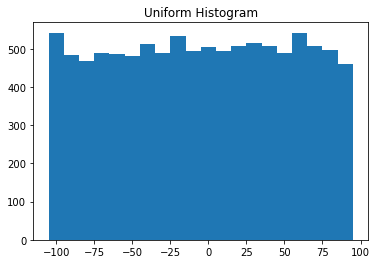

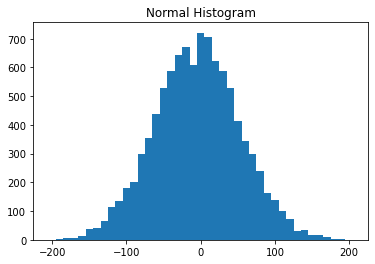

In [2]:
# if you have a one dimension dataset you can get stats like: how many data points you have, the smallest, the largest, the mean, and the standard deviation.
# something more usefull could be an histogram in which  you group your data into buckets.
def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * prob.inverse_normal_cdf(random.random())
          for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")

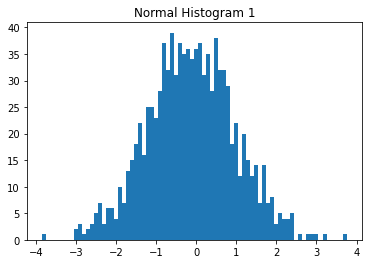

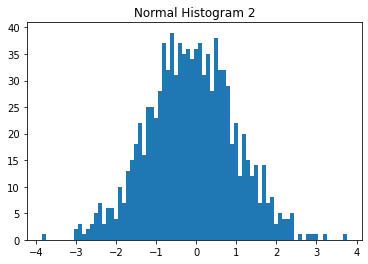

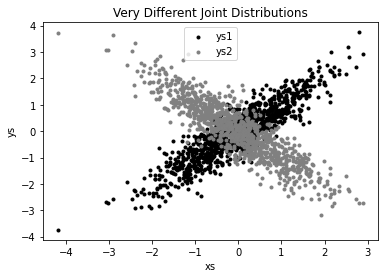

0.9010493686379609
-0.8920981526880033


In [3]:
# two dimensions dataset
def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return prob.inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]
plot_histogram(ys1, 0.1, "Normal Histogram 1") # similar to a normal distribution
plot_histogram(ys1, 0.1, "Normal Histogram 2")
# they look similar to each other but they are completly different
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()
print(stat.correlation(xs, ys1))      # about 0.9
print(stat.correlation(xs, ys2))      # about -0.9

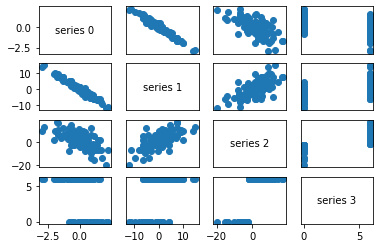

In [4]:
# many dimensions. let's create a matrix of correlation
from typing import List
Vector = List[float]
Matrix = List[List[float]]
def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return la.correlation(data[i], data[j])

    return la.make_matrix(len(data), len(data), correlation_ij)

# corr_data is a list of four 100-d vectors
num_points = 100
def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row
random.seed(0)
corr_rows = [random_row() for _ in range(num_points)]
corr_data = [list(col) for col in zip(*corr_rows)]
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

In [5]:
import datetime
# dict is a another way of representing data
stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}
# but it is error prone
# oops, typo
stock_price['cosing_price'] = 103.06
# or like this but there is no way to get hints about what you are accessing prices.something
prices: Dict[datetime.date, float] = {}

# an alternative are namedtuples
# namedtuples are immutable, so once created they are read-only and there is the problem about the hint annotation
from collections import namedtuple
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

# we can use a typed variant
from typing import NamedTuple
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [6]:
# dataclasses are new since Python 3.7
# instead of inheriting from a base class we use a decorator
from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

# this way we can access and modify values as we want
price2.closing_price /= 2
assert price2.closing_price == 53.015
# It's a regular class, so add new fields however you like! That's could be a problem, we wanted to avoid it.
price2.cosing_price = 75  # oops

In [7]:
# the real-world has a lot of dirty data and it's good pratice and easier to create functions you can test to use as cleaner/processing for your data
from dateutil.parser import parse
def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])
assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

# if you edge cases, like missing data or not a number
from typing import Optional
import re
def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row
    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)
# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None
# But should return same as before if data is good
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

# we can read and return only valid rows or apply any kind of logic we prefer
import csv
data: List[StockPrice] = []
with open("stocks.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        rowR = [row['Symbol'], row['Date'], row['Close']]
        maybe_stock = try_parse_row(rowR)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)

In [8]:
# manipulating data
# we want to get insights from the data, let's get the max of AAPL
max_aapl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")
print(max_aapl_price)

# we can get the max of every symbol
from collections import defaultdict
max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))
for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price
print(max_prices)

# now, we start something more complicated, we want the largest and smallest one-day percent changes. (price_today / price_yesterday - 1)
from typing import List
from collections import defaultdict
# Collect, group the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)
for sp in data:
    prices[sp.symbol].append(sp)
# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}
# we compute a sequence of day-over-day changes
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1
class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    # Assumes prices are for one stock and are in order
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]
# we collect them all
all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]
# we finally get the max and min change
max_change = max(all_changes, key=lambda change: change.pct_change)
print(max_change)
# see e.g. http://news.cnet.com/2100-1001-202143.html
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997, 8, 6)
assert 0.33 < max_change.pct_change < 0.34
min_change = min(all_changes, key=lambda change: change.pct_change)
print(min_change)
# see e.g. http://money.cnn.com/2000/09/29/markets/techwrap/
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000, 9, 29)
assert -0.52 < min_change.pct_change < -0.51

# we can use all_changes to find wich month is the best to invest in tech stocks
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}
for change in all_changes:
    changes_by_month[change.date.month].append(change)
avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}
print(max(avg_daily_change.values())) # October is the best month
assert avg_daily_change[10] == max(avg_daily_change.values())

232.070007
defaultdict(<function <lambda> at 0x000001D393CD6310>, {'AAPL': 232.070007, 'MSFT': 115.610001, 'FB': 217.5, 'GOOG': 1268.329956})
DailyChange(symbol='AAPL', date=datetime.date(1997, 8, 6), pct_change=0.33227854830957937)
DailyChange(symbol='AAPL', date=datetime.date(2000, 9, 29), pct_change=-0.5186915679972073)
0.002905423893850083


In [9]:
# SCALING
# we need to be careful with different units inches and centimeters with kilos
a_to_b = la.distance([63, 150], [67, 160])        # 10.77
a_to_c = la.distance([63, 150], [70, 171])        # 22.14
b_to_c = la.distance([67, 160], [70, 171])        # 11.40

a_to_b = la.distance([160, 150], [170.2, 160])    # 14.28
a_to_c = la.distance([160, 150], [177.8, 171])    # 27.53
b_to_c = la.distance([170.2, 160], [177.8, 171])  # 13.37

# let's rescale the our data so that each dimenstion has mean 0 and standard deviation 1
from typing import Tuple
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and standard deviation for each position"""
    dim = len(data[0])
    means = la.vector_mean(data)
    stdevs = [stat.standard_deviation([vector[i] for vector in data])
              for i in range(dim)]
    return means, stdevs
vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)
    # Make a copy of each vector
    rescaled = [v[:] for v in data]
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
    return rescaled
means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

In [38]:
# utility wise, it can be really helpful to have an indication of how your processing/crunching is progessing
# when you loop use directly a tqdm trange instead of a normal range to have a progress bar
# be careful sometimes it can crash or have strange visualization bugs
import tqdm
from typing import List
def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

100%|██████████| 100/100 [00:13<00:00,  7.36it/s]


In [16]:
# DIMENSIONALITY REDUCTION
# Principal Component Analysis (PCA) can be used to extract one or more dimensions that capture as much of the variation in the data as possible
# it is mostly used in big datasets with a large number of dimensions.
import tqdm
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]
def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = la.vector_mean(data)
    return [la.subtract(vector, mean) for vector in data]
# in what direction is the data going?
def direction(w: Vector) -> Vector:
    mag = la.magnitude(w)
    return [w_i / mag for w_i in w]
def directional_variance(data: List[Vector], w: Vector) -> float:
    # returns the variance of x in the direction of w
    w_dir = direction(w)
    return sum(la.dot(v, w_dir) ** 2 for v in data)
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    # the gradient of directional variance with respect to w
    w_dir = direction(w)
    return [sum(2 * la.dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]
    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = graddesc.gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")
    return direction(guess)
# once found the direction we can project our data onto it ot find the alues of that component
def project(v: Vector, w: Vector) -> Vector:
    # return the projection of v onto the direction w
    projection_length = la.dot(v, w)
    return la.scalar_multiply(projection_length, w)
# we can find further components
def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    #projects v onto w and subtracts the result from v
    return la.subtract(v, project(v, w))
def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

# in a higher-dimensional dataset we can find all the components
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)
    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [la.dot(v, w) for w in components]
def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

de_meaned = de_mean(pca_data)
fpc = first_principal_component(de_meaned)
assert 0.923 < fpc[0] < 0.925
assert 0.382 < fpc[1] < 0.384

dv: 10279.151: 100%|██████████| 100/100 [00:00<00:00, 617.28it/s]
